Loading the data-- ACMESoftwareCorpData.csv 

In [2]:
df=pd.read_csv("ACMESoftwareCorpData.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

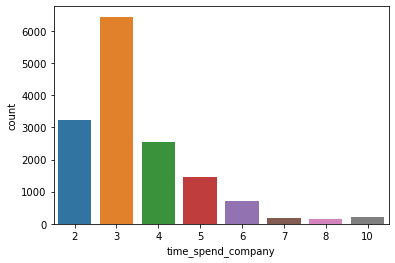

In [5]:
sns.countplot(x="time_spend_company", data = df)

In [6]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

There is no missing data in the dataset. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Data Exploring

In [8]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

'sales' feature looks like a department names to me and I am going to rename it to 'department' for clarification

In [10]:
df = df.rename(columns = {"sales": "department"})

In [11]:
df.info() #checked to see if the sales turned into department

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
df.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


<AxesSubplot:xlabel='department', ylabel='count'>

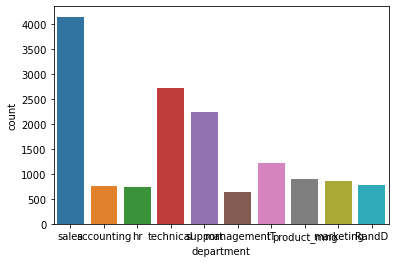

In [14]:
sns.countplot(x="department", data = df)

In [15]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [16]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who worked longer hours tend to leave the company. 

In [17]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


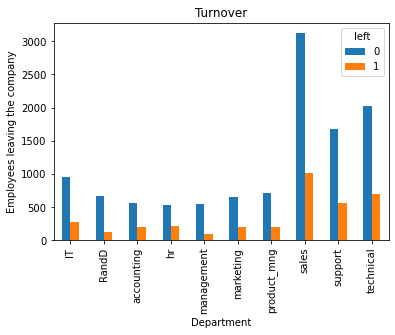

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df.department,df.left).plot(kind='bar')
plt.title('Turnover')
plt.xlabel('Department')
plt.ylabel('Employees leaving the company')
plt.savefig('department_bar_chart')

In [19]:
pd.crosstab(df.satisfaction_level, df.time_spend_company)

time_spend_company,2,3,4,5,6,7,8,10
satisfaction_level,,,,,,,,
0.09,2,0,168,25,0,0,0,0
0.10,0,1,321,36,0,0,0,0
0.11,0,2,304,29,0,0,0,0
0.12,3,6,10,5,6,0,0,0
0.13,5,7,12,22,8,0,0,0
...,...,...,...,...,...,...,...,...
0.96,57,91,26,7,10,4,4,4
0.97,67,64,15,5,13,4,4,4
0.98,53,81,25,3,11,0,0,10


In [20]:
pd.crosstab(df.promotion_last_5years, df.department)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
promotion_last_5years,,,,,,,,,,
0,1224,760,753,724,561,815,902,4040,2209,2692
1,3,27,14,15,69,43,0,100,20,28


promotions do not happen often!

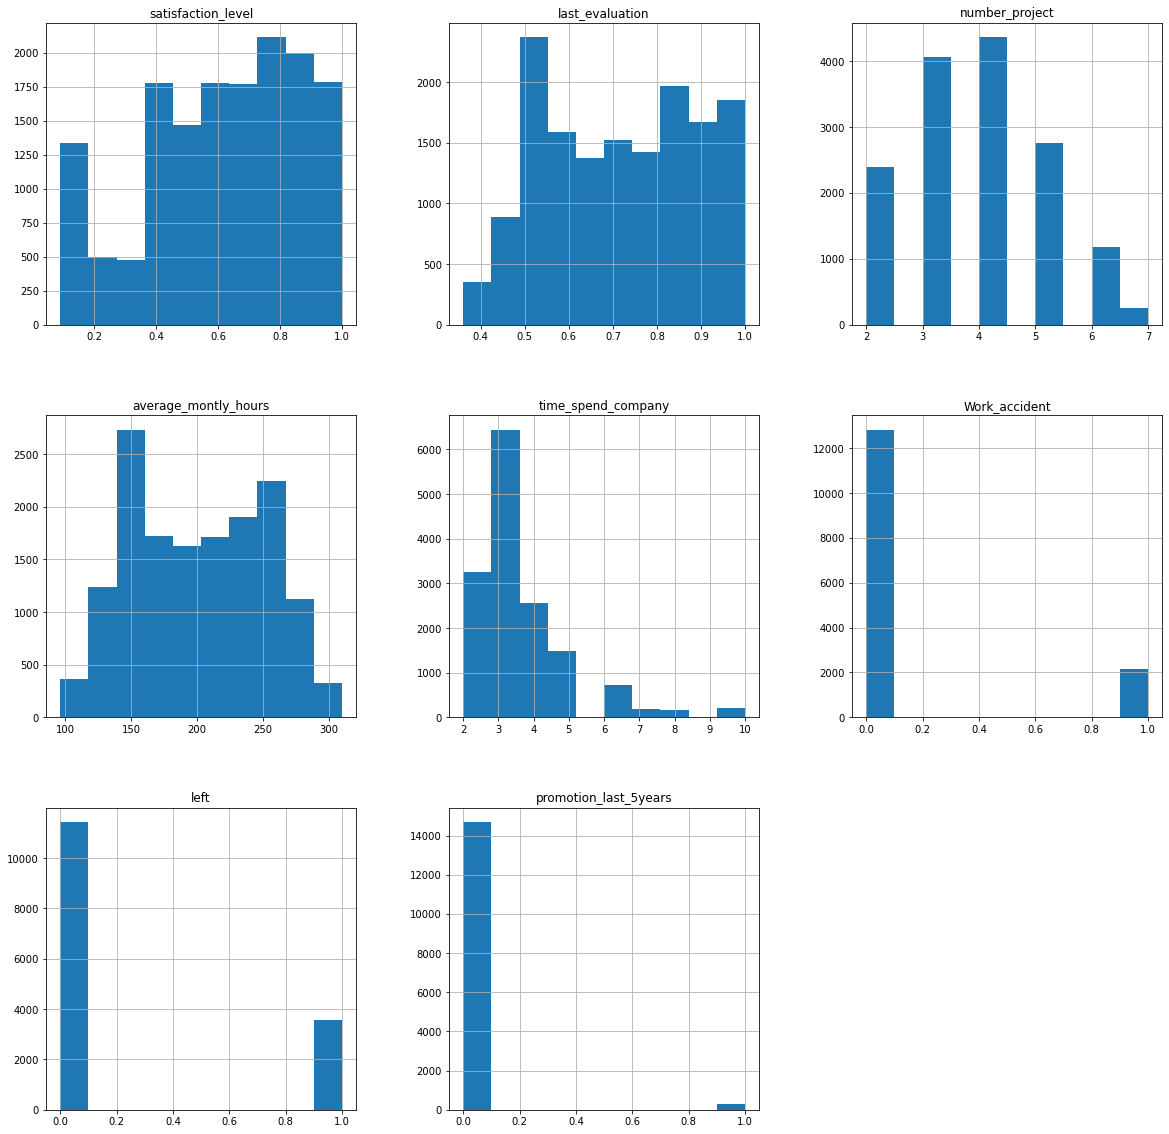

In [21]:
num_bins = 10

df.hist(bins=num_bins, figsize=(20,20))
plt.savefig("Histogram")
plt.show()

<AxesSubplot:>

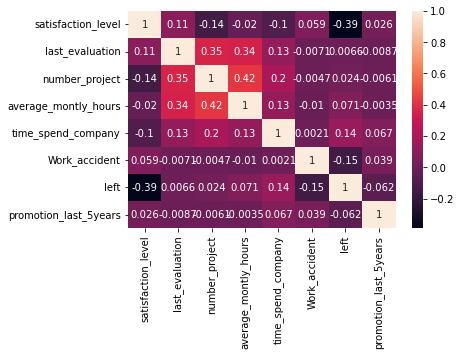

In [22]:
sns.heatmap(df.corr(), annot=True)

Dataset does not seem to be correlated!

One of the tasks is to convert the categorical variables into numbers."sales" which is 'department' now and "salary" features are non-numeric. I will create a dummy variables. 

In [23]:
print(df[['department', 'salary']].describe())
print(df.department.unique())
print(df.salary.unique())

       department salary
count       14999  14999
unique         10      3
top         sales    low
freq         4140   7316
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [24]:
print(df[['department', 'left']].describe())
print(df.department.unique())
print(df.salary.unique())

               left
count  14999.000000
mean       0.238083
std        0.425924
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [25]:
dept_table = pd.crosstab(df['department'], df['left'])
dept_table

left,0,1
department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [26]:
dept_left = dept_table.apply(lambda row: (row/row.sum())*100, axis = 1)
dept_left

left,0,1
department,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


R&D and management has the lowest rate interms of leaving the company, and HR and accounting have higher percentage of leaving.

<AxesSubplot:xlabel='department', ylabel='count'>

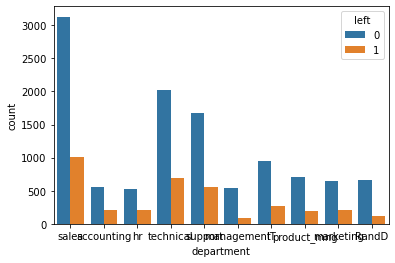

In [27]:
sns.countplot(x='department', hue='left', data=df)

<AxesSubplot:xlabel='salary', ylabel='count'>

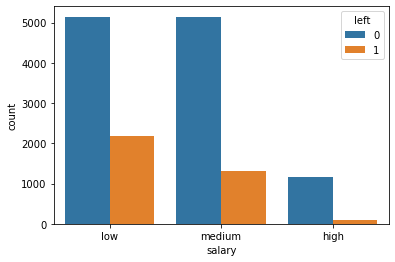

In [28]:
sns.countplot(x='salary', hue='left', data=df)

<AxesSubplot:xlabel='salary', ylabel='count'>

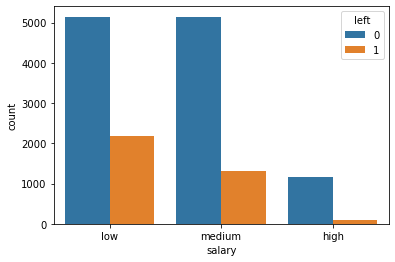

In [29]:
sns.countplot(x='salary', hue='left', data=df)

/Users/elifcakir/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


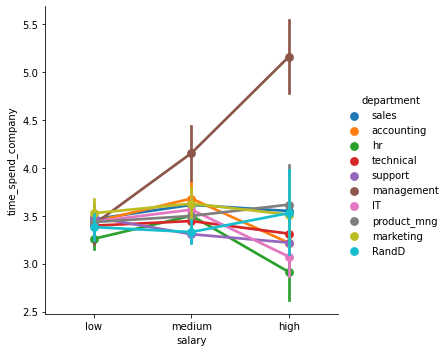

In [30]:
sns.factorplot(x='salary', y='time_spend_company', hue='department', data=df)

<AxesSubplot:xlabel='salary', ylabel='count'>

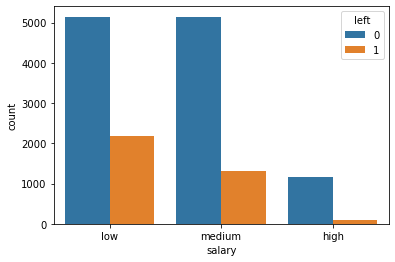

In [31]:
sns.countplot(x='salary', hue='left', data=df)

<AxesSubplot:xlabel='department'>

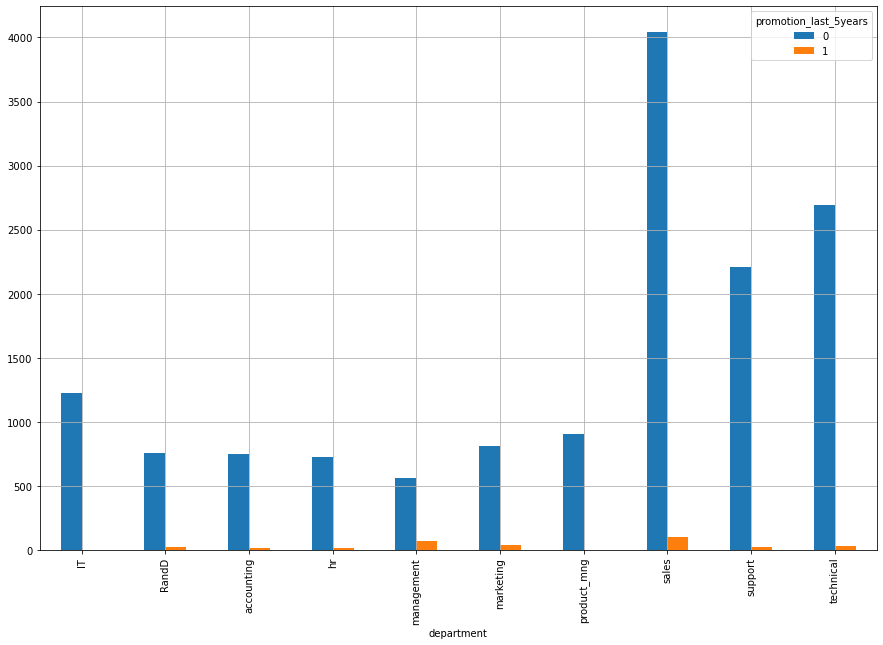

In [32]:
dep_sal = pd.crosstab(df.department, df.promotion_last_5years)
dep_sal.plot(kind = 'bar', stacked = False, grid = True, 
           figsize = (15,10))

sales department had the hightest number of promotions in the past 5 years, however it is important to mention that sales department has the highest number of employees.

In [33]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [34]:
df.shape

(14999, 10)

In [35]:
turnover_rate = df.left.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

Roughly 76% of employees stayed and 24% of employees left the company 

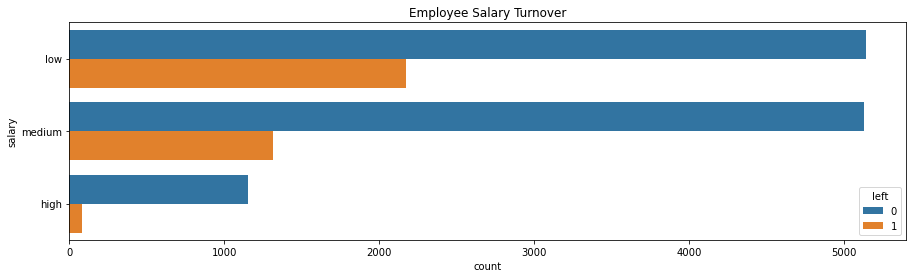

In [38]:
#Even employees with high salary left
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary Turnover');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

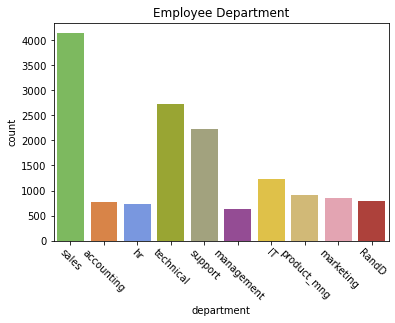

In [39]:

color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department');
 
plt.xticks(rotation=-45)

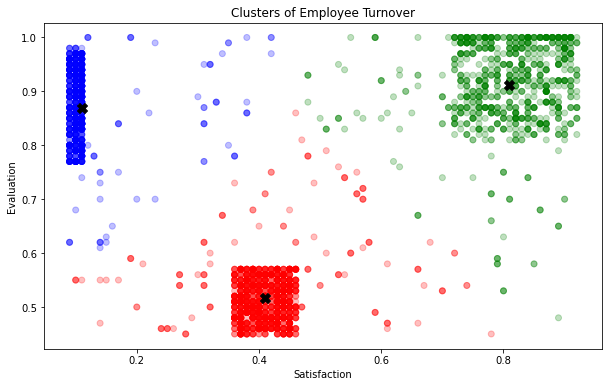

In [46]:
from sklearn.cluster import KMeans

#clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.left==1][["satisfaction_level","last_evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

Creating dummy variables for 'department' and 'salary' variables

In [56]:
features = ['department','salary']
df_final = pd.get_dummies(df,columns=features,drop_first=True)

In [58]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [59]:
df_final.shape

(14999, 19)

Building the Model

In [60]:
#Spliting df_finaldata into training and testing datasets

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
#since I am predicting who is likely to stay and leave, I am leaving 'left' variable out

X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

In [118]:
X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

In [119]:
#I preferred 80% train, 20% test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
#Using standardScaler to make sure that the dataset values have a mean of zero and a unit variable. It is important because when comparing features that have different measurements. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [121]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD

In [122]:
#using Sequential to initialize a linear stack of layers. In a classification problem, we create a classifier variable.

classifier = Sequential()
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=18))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [123]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
1200/1200 [==============================] - 2s 1ms/step - loss: 0.4052 - accuracy: 0.8284
Epoch 2/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.2129 - accuracy: 0.9334
Epoch 3/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1767 - accuracy: 0.9478
Epoch 4/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1669 - accuracy: 0.9512
Epoch 5/20
1200/1200 [==============================] - 2s 1ms/step - loss: 0.1638 - accuracy: 0.9517
Epoch 6/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1613 - accuracy: 0.9532
Epoch 7/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1592 - accuracy: 0.9530
Epoch 8/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1574 - accuracy: 0.9522
Epoch 9/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1564 - accuracy: 0.9528
Epoch 10/20
1200/1200 [==============================] - 2s 1ms/step - loss: 0.155

In [124]:
classifier.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 9)                 171       
                                                                 
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [125]:
#Running Predictions on the Test set

y_pred = classifier.predict(X_test)

94/94 [==============================] - 0s 855us/step


In [126]:
y_pred = (y_pred > 0.5)

In [127]:
# Creating aconfusion matrix to check the number of predictions in terms of correct and incorrect predictions


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2235,   69],
       [  65,  631]])

In [128]:
#Creating a nicer looking confusion matrix

def table_confusion_matrix(y_test, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_test, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [129]:
table_confusion_matrix(y_test,y_pred,labels=['Stay','Left'])

,Predicted Stay,Predicted Left
Stay,2235,69
Left,65,631


The confusion matrix output means that the DL model that I created made 2169 + 687 correct predictions and 72 + 72 incorrect predictions. The way to calcuate accuracy is: (2169 + 687) / 3000. The total number of observations in the dataset is 3000. This is an accuracy of 95.2%. That is a high   accuracy rate.

In [130]:
#Reportin the performance metrics (precision, recall, accuracy)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2304
           1       0.90      0.91      0.90       696

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [131]:
new_pred = classifier.predict(sc.transform(np.array([[0.26,0.7 ,3., 238., 6., 0.,0.,0.,0., 0.,0.,0.,0.,0.,1.,0., 0.,1.]])))
new_pred = (new_pred > 0.5)
new_pred

1/1 [==============================] - 0s 18ms/step


array([[False]])

In [132]:
new_pred = (new_pred > 0.6)
new_pred

array([[False]])

In [133]:
#Improving the model accuracy

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score



In [135]:
#creating a function
def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

I created a function that in the next argument -KerasClassifier- will work. In the function, I initialized the classifier with Sequential(), and then I used Dense to create the input and output layers. 

In [136]:
classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=1)

/var/folders/_g/cys7fyzx6_s3vp56548hlpx00000gn/T/ipykernel_74317/128404206.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=1)


In [137]:
#Now doing a cross-validation using Scikit-learn cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train,y = y_train,cv = 10,n_jobs = -1)

120/120 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.8999


In [138]:
#roughly 85% accuray-mean
mean = accuracies.mean()
mean

0.8499916553497314

In [139]:
#Low-variance means that my model is performing well-- 0.002 is considered low!
variance = accuracies.var()
variance

0.0023005556473351873

The model's accuracy has improved after the cross-validation!

In [151]:
#Adding dropout regularization to over come Over-fitting:

Adding dropout regularization to over come Over-fitting:
Dropout layer has a rate parameter that shows the number of neurons that will become deactivated in each iteration. Deactivating neurons happens randomly. I will specify 1% learning-rate to deactivate neurons during the training process. The network does not change during the drop out regulatization.

In [150]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [160]:
#Grid search is a technique that gives an experiment with different model parameters to give the ones that give you the best accuracy

In [152]:
from sklearn.model_selection import GridSearchCV
def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= optimizer,loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [153]:
#Using GridSearchCV function
classifier = KerasClassifier(build_fn = make_classifier)

/var/folders/_g/cys7fyzx6_s3vp56548hlpx00000gn/T/ipykernel_74317/449582724.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = make_classifier)


In [154]:
# setting parameters to play around
#Since this is a small dataset, a batch size of between 20–35 should be enough
params = {
    'batch_size':[20,35],
    'epochs':[2,3],
    'optimizer':['adam','rmsprop']
}

In [167]:
#Now trying different parameters
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring="accuracy",
                           cv=2)

In [168]:
grid_search = grid_search.fit(X_train,y_train)

Epoch 1/2
300/300 [==============================] - 1s 1ms/step - loss: 0.5598 - accuracy: 0.7721
Epoch 2/2
188/188 [==============================] - 0s 859us/step
Epoch 1/2
300/300 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.7582
Epoch 2/2
188/188 [==============================] - 0s 778us/step
Epoch 1/2
300/300 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.7568
Epoch 2/2
188/188 [==============================] - 0s 785us/step
Epoch 1/2
300/300 [==============================] - 1s 981us/step - loss: 0.5702 - accuracy: 0.7622
Epoch 2/2
188/188 [==============================] - 0s 795us/step
Epoch 1/3
300/300 [==============================] - 1s 1ms/step - loss: 0.5729 - accuracy: 0.7695
Epoch 2/3
300/300 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8558
Epoch 3/3
188/188 [==============================] - 0s 798us/step
Epoch 1/3
300/300 [==============================] - 1s 1ms/step - lo

In [169]:
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [170]:
best_param

{'batch_size': 20, 'epochs': 3, 'optimizer': 'adam'}

In [171]:
best_accuracy

0.8762365810968495

the best accuracy for the classifier is 85%. Employee turnover model predicts if an employee stays or leaves with an accuracy of 87%.